# 

In [6]:
#Import all the necessary data packages
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf

In [7]:
#VIX- CBOE volatility index(market fear indicator)
#TNX-10Y US treasury yield(Interest rate indicator)
#DX-Y,NYD-US dollar index(strenght on US dollar)
#CL=F-Crude oil future(Inflation/energy proxy)
#GC=F-Gold futures(safe asset)

In [14]:
#1. Download data from yahoo finance
#^VIX - VBOX volatility index(market fear indicator)
#^TNX- 10Y US t yield(Interest rate indicator)
#DX-Y.NYB - US Dollar index(strenght of USD dollar)
#CL=F - Crude oil futures(Inflation/energy proxy)
#GC=F - gold futures(safe asset)

tickers=['BAC','JPM','MS','C','WFC','SPY','^VIX','^TNX','DX-Y.NYB','CL=F','GC=F']
data=yf.download(tickers,start='2002-01-01',end='2025-01-01')
data=data['Close']
data

[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739315,276.156769,21.010000,115.790001,278.899994,18.587133,27.954086,75.131615,11.306938,5.157,22.709999
2002-01-03,17.719593,276.373352,20.370001,116.110001,278.200012,19.083120,28.764055,75.983566,11.348584,5.120,21.340000
2002-01-04,17.995714,281.516479,21.620001,116.330002,278.899994,19.942171,30.191629,76.490845,11.377221,5.141,20.450001
2002-01-07,17.781578,278.213898,21.480000,116.330002,278.600006,19.891048,29.963816,75.951057,11.395437,5.057,21.940001
2002-01-08,17.497009,267.981873,21.250000,116.830002,278.899994,19.737633,29.336090,75.775482,11.351186,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.843319,69.952347,70.099998,108.260002,2620.000000,239.589233,125.215454,599.496582,70.849594,4.591,14.270000
2024-12-26,44.011265,70.297180,69.620003,108.129997,2638.800049,240.409912,126.171379,599.536499,71.017845,4.579,14.730000
2024-12-27,43.803802,69.952347,70.599998,108.000000,2617.199951,238.462036,124.919815,593.225464,70.374565,4.619,15.950000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   SPY       5789 non-null   float64
 8   WFC       5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [16]:
#statistical summary of your data
data.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,21.966545,110.073951,66.811741,90.834779,1212.050857,60.711952,37.520453,189.795911,29.555229,3.079020,19.471192
std,9.983902,110.526009,24.071656,10.092432,555.276716,49.422008,23.835383,133.739861,13.009360,1.158701,8.613284
min,2.456464,7.663625,-37.630001,71.330002,278.100006,8.205747,6.460621,50.379547,5.385915,0.499000,9.140000
25%,12.661820,36.660889,48.520000,81.879997,732.649994,25.016439,21.585949,87.050362,18.207214,2.130000,13.610000
50%,22.729923,50.757572,66.230003,90.779999,1253.000000,37.881184,29.309080,133.817032,24.392467,2.979000,17.100000
75%,29.378307,197.121613,84.514999,97.825001,1648.750000,89.981758,42.486694,258.136475,40.995255,4.099500,22.530001
max,46.931263,383.228302,145.289993,120.239998,2788.500000,247.479630,133.030334,603.954346,76.550026,5.428000,82.690002


In [17]:
#How many missing values are in my data
data.isnull().sum()

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
SPY         21
WFC         21
^TNX        27
^VIX        21
dtype: int64

In [22]:
#applying forward fill on my data set
data=data.ffill()
data

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739315,276.156769,21.010000,115.790001,278.899994,18.587133,27.954086,75.131615,11.306938,5.157,22.709999
2002-01-03,17.719593,276.373352,20.370001,116.110001,278.200012,19.083120,28.764055,75.983566,11.348584,5.120,21.340000
2002-01-04,17.995714,281.516479,21.620001,116.330002,278.899994,19.942171,30.191629,76.490845,11.377221,5.141,20.450001
2002-01-07,17.781578,278.213898,21.480000,116.330002,278.600006,19.891048,29.963816,75.951057,11.395437,5.057,21.940001
2002-01-08,17.497009,267.981873,21.250000,116.830002,278.899994,19.737633,29.336090,75.775482,11.351186,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.843319,69.952347,70.099998,108.260002,2620.000000,239.589233,125.215454,599.496582,70.849594,4.591,14.270000
2024-12-26,44.011265,70.297180,69.620003,108.129997,2638.800049,240.409912,126.171379,599.536499,71.017845,4.579,14.730000
2024-12-27,43.803802,69.952347,70.599998,108.000000,2617.199951,238.462036,124.919815,593.225464,70.374565,4.619,15.950000


In [23]:
#How many null values are in my data set
data.isnull().sum()

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
SPY         0
WFC         0
^TNX        0
^VIX        0
dtype: int64

In [24]:
#correlation in our data
data.corr()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Ticker,,,,,,,,,,,
BAC,1.000000,0.461779,-0.070637,0.360871,0.071502,0.569557,0.786216,0.544844,0.342323,0.381009,-0.214983
C,0.461779,1.000000,-0.328865,-0.056293,-0.753355,-0.404546,-0.078854,-0.429433,-0.509659,0.716295,-0.165584
CL=F,-0.070637,-0.328865,1.000000,-0.513374,0.436498,0.117551,0.110137,0.140270,0.149889,-0.045080,-0.111997
DX-Y.NYB,0.360871,-0.056293,-0.513374,1.000000,0.165210,0.527508,0.509171,0.542913,0.449883,0.055238,0.003703
GC=F,0.071502,-0.753355,0.436498,0.165210,1.000000,0.787185,0.581200,0.810607,0.694652,-0.526051,-0.022830
JPM,0.569557,-0.404546,0.117551,0.527508,0.787185,1.000000,0.902370,0.987253,0.834764,-0.196493,-0.136455
MS,0.786216,-0.078854,0.110137,0.509171,0.581200,0.902370,1.000000,0.901737,0.660625,0.098139,-0.153446
SPY,0.544844,-0.429433,0.140270,0.542913,0.810607,0.987253,0.901737,1.000000,0.824806,-0.243903,-0.126401
WFC,0.342323,-0.509659,0.149889,0.449883,0.694652,0.834764,0.660625,0.824806,1.000000,-0.322967,-0.333026


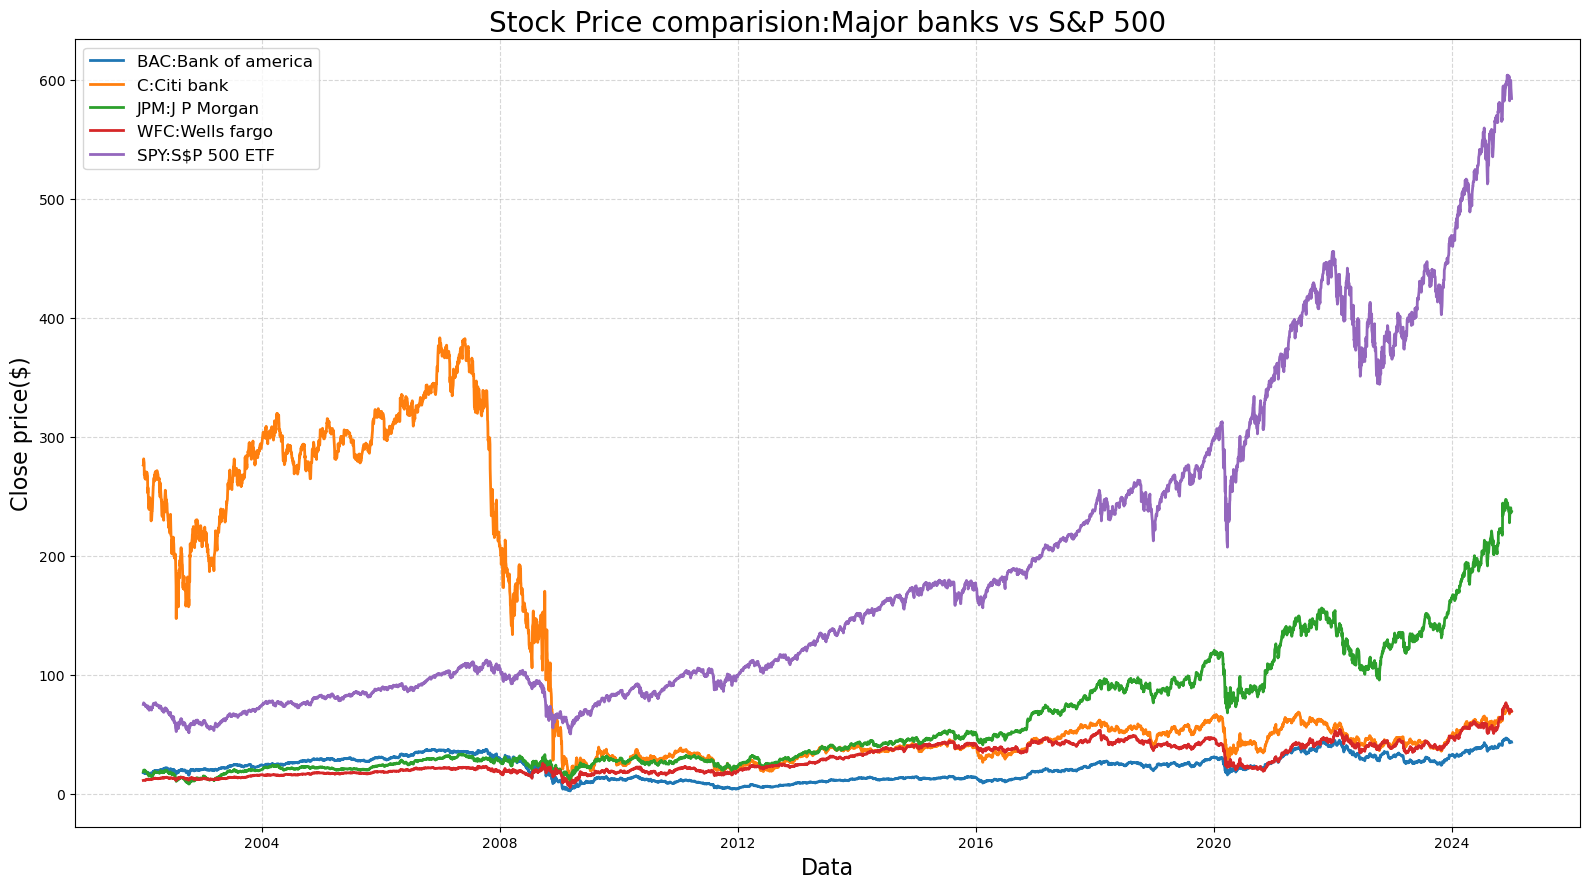

In [41]:
import matplotlib.pyplot as plt

#create a larger picture
plt.figure(figsize=(16,9))

#plot each stock
plt.plot(data.index, data['BAC'],label='BAC:Bank of america', linewidth = 2)
plt.plot(data.index, data['C'],label='C:Citi bank', linewidth = 2)
plt.plot(data.index, data['JPM'],label='JPM:J P Morgan', linewidth = 2)
plt.plot(data.index, data['WFC'],label='WFC:Wells fargo', linewidth = 2)
plt.plot(data.index, data['SPY'],label='SPY:S$P 500 ETF', linewidth = 2)

#TITLE, label for X&Y axis
plt.title('Stock Price comparision:Major banks vs S&P 500',fontsize=20)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Close price($)',fontsize=16)

#add grid lines for readability
plt.grid(True, linestyle='--',alpha=0.5)

#customize legend
plt.legend(fontsize=12, loc='upper left')

#show the plot
plt.tight_layout()
plt.show()

In [42]:
#Feauture engineering

df=pd.DataFrame(index=data.index)
df

""
Date
2002-01-02
2002-01-03
2002-01-04
2002-01-07
2002-01-08
...
2024-12-24
2024-12-26
2024-12-27


In [27]:
#Feauture engineering
df=pd.DataFrame(index=data.index)

#create lag features - for stock data
df['JPM(t-1)']= data['JPM'].shift(1)
df['BAC(t-1)']= data['BAC'].shift(1)
df['MS(t-1)']= data['MS'].shift(1)
df['C(t-1)']= data['C'].shift(1)
df['WFC(t-1)']= data['WFC'].shift(1)
df['SPY(t-1)']= data['SPY'].shift(1)

#create log feautures - for macro economic data
df['^VIX(t-1)']= data['^VIX'].shift(1)
df['10Y_Yield(t-1)']= data['^TNX'].shift(1)
df['Gold_futures(t-1)']= data['GC=F'].shift(1)
df['US_Dollar_Index(t-1)']= data['DX-Y.NYB'].shift(1)
df['Crude_oil_futures(t-1)']= data['CL=F'].shift(1)

#Technical indicators=Moving average, 5 Day rolling volatility
df['BAC_MA5']=data['BAC'].rolling(window=5).mean().shift(1)
df['BAC_MA10']=data['BAC'].rolling(window=10).mean().shift(1)
df['BAC_Volatility5']=data['BAC'].pct_change(5).shift(1)

#create target variable
df['Target']=data['BAC']
df

#drop NAN values
df=df.dropna()
df

#we have to explain to the machine learning that, this are my x variables like t-1 data and have to find y variable like target

,JPM(t-1),BAC(t-1),MS(t-1),C(t-1),WFC(t-1),SPY(t-1),^VIX(t-1),10Y_Yield(t-1),Gold_futures(t-1),US_Dollar_Index(t-1),Crude_oil_futures(t-1),BAC_MA5,BAC_MA10,BAC_Volatility5,Target
Date,,,,,,,,,,,,,,,
2002-01-16,19.364363,17.313868,29.402151,269.173065,11.796283,74.884521,22.700001,4.831,284.399994,117.290001,18.900000,17.300909,17.523775,-0.010467,17.130728
2002-01-17,18.668945,17.130728,28.395838,264.517151,11.804094,73.369286,23.450001,4.839,287.299988,117.589996,18.860001,17.236105,17.462917,-0.018563,17.220892
2002-01-18,18.842798,17.220892,29.295427,270.147400,11.871763,73.922066,22.250000,4.933,284.399994,117.849998,18.040001,17.186516,17.413046,-0.014194,17.130728
2002-01-21,18.362141,17.130728,28.777020,270.472351,11.811899,73.583855,22.520000,4.888,283.100006,117.510002,18.000000,17.180881,17.326548,-0.001642,17.130728
2002-01-22,18.362141,17.130728,28.777020,270.472351,11.811899,73.583855,22.520000,4.888,283.100006,117.660004,18.000000,17.185389,17.261463,0.001317,17.657602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,235.713257,43.359245,122.643349,68.740494,69.810455,592.906433,16.780001,4.599,2612.300049,108.040001,69.239998,43.465939,44.360982,-0.034748,43.843319
2024-12-26,239.589233,43.843319,125.215454,69.952347,70.849594,599.496582,14.270000,4.591,2620.000000,108.260002,70.099998,43.333559,44.225639,-0.014872,44.011265
2024-12-27,240.409912,44.011265,126.171379,70.297180,71.017845,599.536499,14.730000,4.579,2638.800049,108.129997,69.620003,43.541019,44.074489,0.024138,43.803802


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5800 entries, 2002-01-16 to 2024-12-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   JPM(t-1)                5800 non-null   float64
 1   BAC(t-1)                5800 non-null   float64
 2   MS(t-1)                 5800 non-null   float64
 3   C(t-1)                  5800 non-null   float64
 4   WFC(t-1)                5800 non-null   float64
 5   SPY(t-1)                5800 non-null   float64
 6   ^VIX(t-1)               5800 non-null   float64
 7   10Y_Yield(t-1)          5800 non-null   float64
 8   Gold_futures(t-1)       5800 non-null   float64
 9   US_Dollar_Index(t-1)    5800 non-null   float64
 10  Crude_oil_futures(t-1)  5800 non-null   float64
 11  BAC_MA5                 5800 non-null   float64
 12  BAC_MA10                5800 non-null   float64
 13  BAC_Volatility5         5800 non-null   float64
 14  Target                

In [29]:
df.isnull().sum()

JPM(t-1)                  0
BAC(t-1)                  0
MS(t-1)                   0
C(t-1)                    0
WFC(t-1)                  0
SPY(t-1)                  0
^VIX(t-1)                 0
10Y_Yield(t-1)            0
Gold_futures(t-1)         0
US_Dollar_Index(t-1)      0
Crude_oil_futures(t-1)    0
BAC_MA5                   0
BAC_MA10                  0
BAC_Volatility5           0
Target                    0
dtype: int64

In [30]:
#Now have everything, now will do ML thing
#a. Tell what is my x variable and y variable
#b. split our data into training and testing(80:20)
#c. Apply ML Algo
#d. Do prediction
#e. evaluate the model based on RMSE,R2 and MSE
#F. Visualisation - actual and forcast

In [ ]:
#a. Tell what is my x variable and y variable
X= df.drop('Target', axis=1)
Y=df['Target']

In [35]:
X

,JPM(t-1),BAC(t-1),MS(t-1),C(t-1),WFC(t-1),SPY(t-1),^VIX(t-1),10Y_Yield(t-1),Gold_futures(t-1),US_Dollar_Index(t-1),Crude_oil_futures(t-1),BAC_MA5,BAC_MA10,BAC_Volatility5
Date,,,,,,,,,,,,,,
2002-01-16,19.364363,17.313868,29.402151,269.173065,11.796283,74.884521,22.700001,4.831,284.399994,117.290001,18.900000,17.300909,17.523775,-0.010467
2002-01-17,18.668945,17.130728,28.395838,264.517151,11.804094,73.369286,23.450001,4.839,287.299988,117.589996,18.860001,17.236105,17.462917,-0.018563
2002-01-18,18.842798,17.220892,29.295427,270.147400,11.871763,73.922066,22.250000,4.933,284.399994,117.849998,18.040001,17.186516,17.413046,-0.014194
2002-01-21,18.362141,17.130728,28.777020,270.472351,11.811899,73.583855,22.520000,4.888,283.100006,117.510002,18.000000,17.180881,17.326548,-0.001642
2002-01-22,18.362141,17.130728,28.777020,270.472351,11.811899,73.583855,22.520000,4.888,283.100006,117.660004,18.000000,17.185389,17.261463,0.001317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,235.713257,43.359245,122.643349,68.740494,69.810455,592.906433,16.780001,4.599,2612.300049,108.040001,69.239998,43.465939,44.360982,-0.034748
2024-12-26,239.589233,43.843319,125.215454,69.952347,70.849594,599.496582,14.270000,4.591,2620.000000,108.260002,70.099998,43.333559,44.225639,-0.014872
2024-12-27,240.409912,44.011265,126.171379,70.297180,71.017845,599.536499,14.730000,4.579,2638.800049,108.129997,69.620003,43.541019,44.074489,0.024138


In [36]:
Y

Date
2002-01-16    17.130728
2002-01-17    17.220892
2002-01-18    17.130728
2002-01-21    17.130728
2002-01-22    17.657602
                ...    
2024-12-24    43.843319
2024-12-26    44.011265
2024-12-27    43.803802
2024-12-30    43.379002
2024-12-31    43.418518
Name: Target, Length: 5800, dtype: float64

In [44]:
#b. split our data into training and testing(90:10)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle=False,test_size=0.10)

In [38]:
X_train

,JPM(t-1),BAC(t-1),MS(t-1),C(t-1),WFC(t-1),SPY(t-1),^VIX(t-1),10Y_Yield(t-1),Gold_futures(t-1),US_Dollar_Index(t-1),Crude_oil_futures(t-1),BAC_MA5,BAC_MA10,BAC_Volatility5
Date,,,,,,,,,,,,,,
2002-01-16,19.364363,17.313868,29.402151,269.173065,11.796283,74.884521,22.700001,4.831,284.399994,117.290001,18.900000,17.300909,17.523775,-0.010467
2002-01-17,18.668945,17.130728,28.395838,264.517151,11.804094,73.369286,23.450001,4.839,287.299988,117.589996,18.860001,17.236105,17.462917,-0.018563
2002-01-18,18.842798,17.220892,29.295427,270.147400,11.871763,73.922066,22.250000,4.933,284.399994,117.849998,18.040001,17.186516,17.413046,-0.014194
2002-01-21,18.362141,17.130728,28.777020,270.472351,11.811899,73.583855,22.520000,4.888,283.100006,117.510002,18.000000,17.180881,17.326548,-0.001642
2002-01-22,18.362141,17.130728,28.777020,270.472351,11.811899,73.583855,22.520000,4.888,283.100006,117.660004,18.000000,17.185389,17.261463,0.001317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,106.430428,31.089283,78.121063,43.755898,40.594284,381.061035,25.559999,3.265,1696.599976,109.690002,86.610001,31.249461,31.706192,-0.041248
2022-09-06,105.686867,31.052128,78.329582,43.836681,40.297035,377.042999,25.469999,3.193,1709.800049,109.529999,86.870003,31.179378,31.537346,-0.011159
2022-09-07,105.714760,30.708450,77.178192,43.280193,39.832565,375.620300,26.910000,3.340,1700.400024,110.209999,86.879997,31.064551,31.404264,-0.018353


In [51]:
#c. Apply ML Algo: Decision tree
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(max_depth=4) #calling the DT model
dt_model.fit(X_train, Y_train) #Train my DT Model

from sklearn.ensemble import RandomForestRegressor #ensemble meansgroups, it groups lot of decisioon trees
rf_model=RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, Y_train) #Train Model

from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train) #Train Model

from sklearn.svm import  SVR
svr_model=SVR()
svr_model.fit(X_train, Y_train) #Train Model



SVR()

In [53]:
#d. Do prediction, X_test and Y_test are my actual values
dt_pred=dt_model.predict(X_test)
rf_pred=rf_model.predict(X_test)
knn_pred=knn_model.predict(X_test)
svr_pred=svr_model.predict(X_test)

In [54]:
result=pd.DataFrame(Y_test.index)
result['Actual']=Y_test.values
result['DT Predicted']=dt_pred
result['RF Predicted']=rf_pred
result['KNN Predicted']=knn_pred
result['SVR Predicted']=svr_pred
result

,Date,Actual,DT Predicted,RF Predicted,KNN Predicted,SVR Predicted
0,2022-09-12,32.761257,32.107640,32.330587,31.498342,33.071630
1,2022-09-13,31.581589,32.107640,32.607816,31.251211,33.379339
2,2022-09-14,31.460831,32.107640,31.637296,31.297350,32.036707
3,2022-09-15,32.055309,32.107640,31.557825,31.289870,32.161315
4,2022-09-16,31.693047,32.107640,31.980015,31.102021,32.114598
...,...,...,...,...,...,...
575,2024-12-24,43.843319,42.941826,42.906462,34.092498,34.861120
576,2024-12-26,44.011265,42.941826,43.090250,34.092498,34.974332
577,2024-12-27,43.803802,42.941826,43.603453,34.092498,34.589532
578,2024-12-30,43.379002,42.941826,42.953631,34.092498,34.850106


In [57]:
#e. evaluate the model based on RMSE,R2 and MSE
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_model(y_true, y_pred, model_name):
    r2=r2_score(y_true, y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    print("Model Name", model_name)
    print("R2 Value",r2)
    print("MSE",mse)
    print("RMSE", rmse)
    print("\n")#if you want space you will use this

evaluate_model(Y_test, dt_pred, "Decision Tree")
evaluate_model(Y_test, rf_pred, "Random Forest")
evaluate_model(Y_test, knn_pred, "K Nearest Neighbor")
evaluate_model(Y_test, svr_pred, "Support vector regressor")

#so random forest is the best formened because the R2 is 0.98 and the MSE and RMSE is less

Model Name Decision Tree
R2 Value 0.9582605471479557
MSE 1.3232185215275887
RMSE 1.150312358243442


Model Name Random Forest
R2 Value 0.983628243436029
MSE 0.5190152250480763
RMSE 0.7204271129323745


Model Name K Nearest Neighbor
R2 Value -0.5939421215501652
MSE 50.53093879679008
RMSE 7.108511714612988


Model Name Support vector regressor
R2 Value 0.011439848236856287
MSE 31.339200997529318
RMSE 5.598142638190753




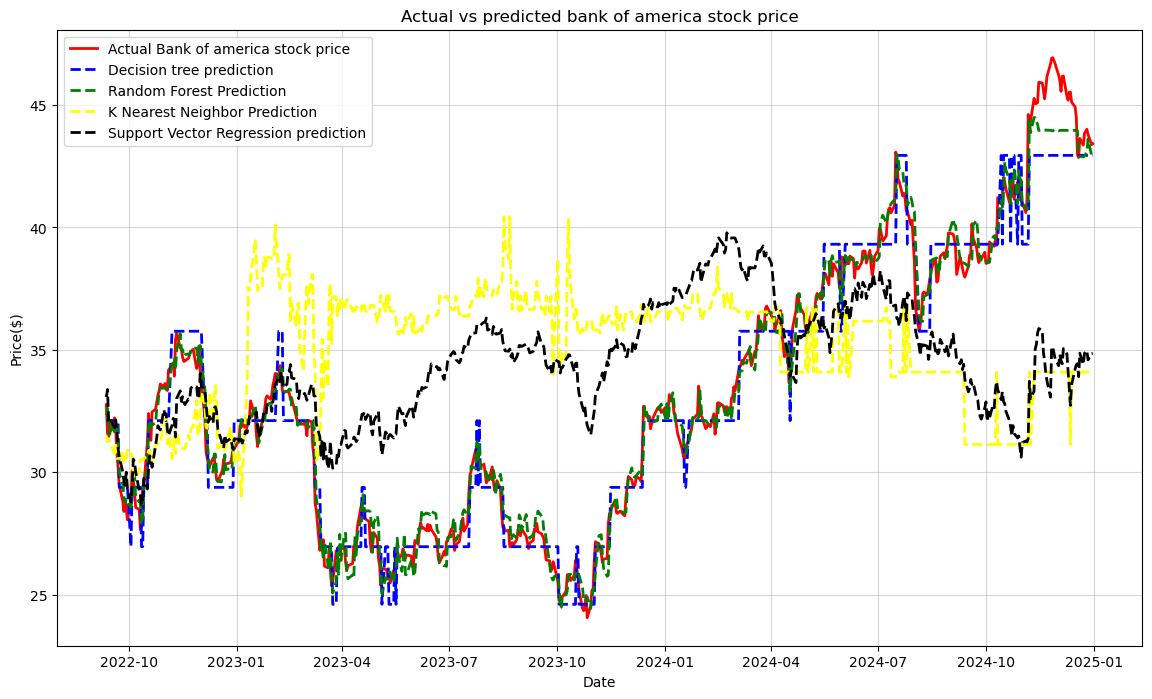

In [60]:
#F. Visualisation - actual and forcast
import matplotlib.pyplot as plt

#plt figure=tell figure size
plt.figure(figsize=(14,8))

#plot actual value to predicted value
plt.plot(Y_test.index, Y_test, label='Actual Bank of america stock price', linewidth=2, color='red')
plt.plot(Y_test.index, dt_pred, label='Decision tree prediction', linewidth=2, color='blue', linestyle='--')
plt.plot(Y_test.index, rf_pred, label='Random Forest Prediction', linewidth=2, color='Green', linestyle='--')
plt.plot(Y_test.index, knn_pred, label='K Nearest Neighbor Prediction', linewidth=2, color='Yellow', linestyle='--')
plt.plot(Y_test.index, svr_pred, label='Support Vector Regression prediction', linewidth=2, color='black', linestyle='--')

#hightlight title, xlabel and ylabel
plt.title("Actual vs predicted bank of america stock price")
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [48]:
#what all feautures are important
importance=dt_model.feature_importances_
features_name=X_train.columns

df_features=pd.DataFrame({'Feature':features_name,'Importance':importance})
df_features=df_features.sort_values(by='Importance',ascending=False)
df_features

,Feature,Importance
1,BAC(t-1),1.0
0,JPM(t-1),0.0
2,MS(t-1),0.0
3,C(t-1),0.0
4,WFC(t-1),0.0
5,SPY(t-1),0.0
6,^VIX(t-1),0.0
7,10Y_Yield(t-1),0.0
8,Gold_futures(t-1),0.0
9,US_Dollar_Index(t-1),0.0


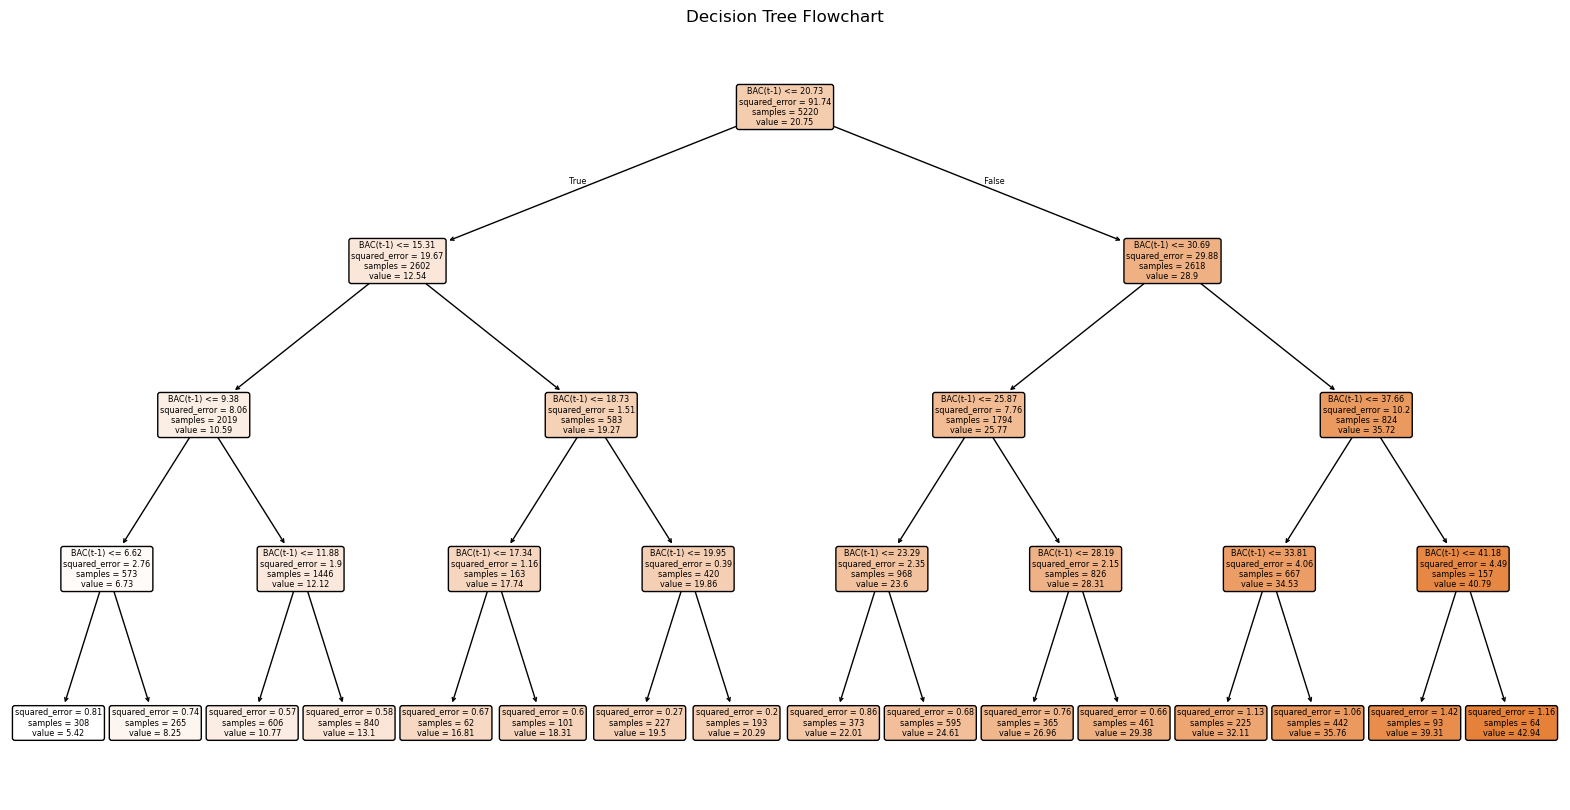

In [49]:
#what question is decision tree is asking, in decision tree we have to highlight the depth of the decision tree, if you give 5, then it asks maximum of 5 questions

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, precision=2)
plt.title("Decision Tree Flowchart")
plt.show()